In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.stats import skew
import scipy.stats as st


**Pair Programming Repaso Conceptos Resumidos**

Al igual que en los ejercicios de pair programming de estadística, deberéis elegir un set de datos, puede ser de cualquier tipo.

El objetivo de este pair programming es:

In [2]:
influencer = pd.read_csv("instagram_global_top_1000.csv")
influencer.head()

,Country,Rank,Account,Title,Link,Category,Followers,Audience Country,Authentic engagement,Engagement avg,Scraped
0,All,1,cristiano,Cristiano Ronaldo,https://www.instagram.com/cristiano/,Sports with a ball,400100000.0,India,7800000.0,9500000.0,2022-02-07 16:50:24.798803
1,All,2,kyliejenner,Kylie 🤍,https://www.instagram.com/kyliejenner/,Fashion|Modeling|Beauty,308800000.0,United States,6200000.0,10100000.0,2022-02-07 16:50:24.798803
2,All,3,leomessi,Leo Messi,https://www.instagram.com/leomessi/,Sports with a ball|Family,306300000.0,Argentina,4800000.0,6500000.0,2022-02-07 16:50:24.798803
3,All,4,kendalljenner,Kendall,https://www.instagram.com/kendalljenner/,Modeling|Fashion,217800000.0,United States,3400000.0,5400000.0,2022-02-07 16:50:24.798803
4,All,5,selenagomez,Selena Gomez,https://www.instagram.com/selenagomez/,Music|Lifestyle,295800000.0,United States,2700000.0,3600000.0,2022-02-07 16:50:24.798803


Hacer una exploración inicial del dataframe:

¿Cuántas columnas tiene?

In [3]:
#1
influencer.columns

# nombre de las columnas

Index(['Country', 'Rank', 'Account', 'Title', 'Link', 'Category', 'Followers',
       'Audience Country', 'Authentic engagement', 'Engagement avg',
       'Scraped'],
      dtype='object')

¿Cuántas filas tiene?

In [4]:
#2
influencer.shape

#1000 filas 11 columnas

(1000, 11)

¿Cuántas nulos tiene?

¿Qué tipo de datos tenemos en el dataframe?

In [5]:
#3. para ver el nombre de las columnas y el tipo de datos que tenemos en cada una y los elementos no nulos.
influencer.info(null_counts = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Country               1000 non-null   object 
 1   Rank                  1000 non-null   int64  
 2   Account               1000 non-null   object 
 3   Title                 983 non-null    object 
 4   Link                  1000 non-null   object 
 5   Category              909 non-null    object 
 6   Followers             1000 non-null   float64
 7   Audience Country      993 non-null    object 
 8   Authentic engagement  1000 non-null   float64
 9   Engagement avg        1000 non-null   float64
 10  Scraped               1000 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 86.1+ KB


/var/folders/qq/jtqr5_ts3_5frnqgj2ky0sjr0000gn/T/ipykernel_70949/2220235063.py:2: FutureWarning: null_counts is deprecated. Use show_counts instead
  influencer.info(null_counts = True)


In [6]:
#4
influencer.isnull().sum()

Country                  0
Rank                     0
Account                  0
Title                   17
Link                     0
Category                91
Followers                0
Audience Country         7
Authentic engagement     0
Engagement avg           0
Scraped                  0
dtype: int64

¿Y duplicados?

In [7]:
influencer.duplicated().sum()

#no tenemos duplicados, en el caso de tenerlos deberiamos eliminarlos.

0

In [8]:
#5. Principales estadisticos de las columnas
#el .t nos transpone el resultado del describe
# describe es para las variables numericas
influencer.describe().T

,count,mean,std,min,25%,50%,75%,max
Rank,1000.0,500.5,2.888194e+02,1.0,250.75,500.5,750.25,1000.0
Followers,1000.0,24836100.0,3.872143e+07,2800000.0,9000000.00,14400000.0,25650000.00,469600000.0
Authentic engagement,1000.0,649122.8,1.098804e+06,0.0,209100.00,363700.0,683250.00,13400000.0
Engagement avg,1000.0,865388.6,1.267515e+06,52000.0,308600.00,523900.0,950800.00,13400000.0


In [9]:
#6 #para las variables categóricas
influencer.describe(include = object).T

,count,unique,top,freq
Country,1000,1,All,1000
Account,1000,1000,cristiano,1
Title,983,982,НАСТЯ ИВЛЕЕВА,2
Link,1000,1000,https://www.instagram.com/cristiano/,1
Category,909,165,Music,170
Audience Country,993,31,United States,283
Scraped,1000,1,2022-02-07 16:50:24.798803,1000


etc...

-----------------------------------

Plantead una serie de preguntas como las que fuimos contestando en la clase invertida.

Contestad a las preguntas planteadas usando los principales estadísticos que hemos aprendido y gráficas que mejor se ajusten.

In [ ]:
## Media, Mediana , Moda, mínimo y máximo

# - ¿Cuál es la cantidad más repetida de followers?
# Para responder a esta pregunta, podemos recurrir a las dos medidas de centro más comunes: la **media**, la **mediana** o la **moda**.

In [ ]:
# - ¿Cual es la cantidad más alta de followers más followers? ¿Y más baja? 

max_influencers = influencer["Followers"].max()
min_influencers = influencer["Followers"].min()

print(f"El número de seguidores de la cuenta que tiene más es {max_influencers} y del que tiene menos es {min_influencers}")

El número de seguidores de la cuenta que tiene más es 469600000.0 y del que tiene menos es 2800000.0


In [ ]:
# - ¿Cuál es el número medio de followers?
# MEDIA: es un promedio de todos los seguidores.

media_influencers = influencer["Followers"].mean()

print(f"El número medio de seguidores es: {media_influencers}")

El número medio de seguidores es: 24836100.0


In [ ]:
# MEDIANA: es el valor de la posición central de una lista ordenada de números, en este caso, la columna sobre la que queremos calcular la mediana.

mediana_influencers = influencer["Followers"].median()

print(f"La mediana de los seguidores de Instagram es {mediana_influencers}")

La mediana de los seguidores de Instagram es 14400000.0


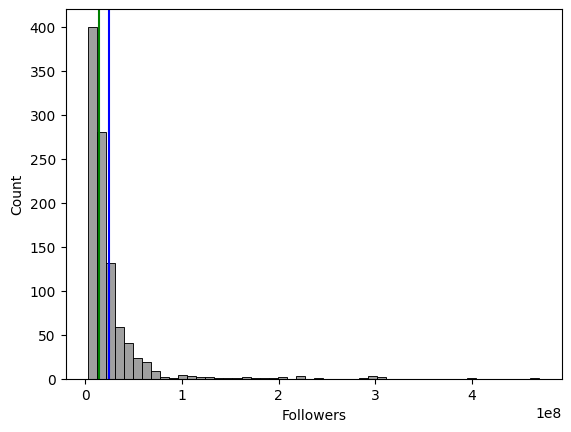

In [ ]:
# sigamos recordando un poco gráficas. En este caso. queremos ver como están distribuidos los seguidores.
# Para esto podemos usar un histplot o un barplot

sns.histplot(data = influencer, x = "Followers", bins = 50, color = "grey")
plt.axvline(media_influencers, color='blue')
plt.axvline(mediana_influencers, color='green');

In [ ]:
skewness_influencers = skew(influencer['Followers'])
print(skewness_influencers)

5.841688024139401


In [ ]:
# Queremos realizar el calculo de confianza para la cantidad de Followers
dato = influencer['Followers']

# Utilizamos Scipy para calcular el intervalo de confianza del 95% de la media de los datos.
# Dicho intervalo nos indica donde está la media de los valores de los seguidores con un 95 de probabilidad.
print(st.t.interval(alpha=0.95, df=len(dato)-1, loc=np.mean(dato), scale=st.sem(dato)))

# Lo comparamos con la media obtenido de los datos disponibles hasta el momento.
print(np.mean(dato))

(22433253.549261674, 27238946.450738326)
24836100.0


/var/folders/qq/jtqr5_ts3_5frnqgj2ky0sjr0000gn/T/ipykernel_63607/2403773870.py:6: DeprecationWarning: Use of keyword argument `alpha` for method `interval` is deprecated. Use first positional argument or keyword argument `confidence` instead.
  print(st.t.interval(alpha=0.95, df=len(dato)-1, loc=np.mean(dato), scale=st.sem(dato)))


In [ ]:
varianza_influencers = influencer["Followers"].var()

print(f"La varianza de los seguidores es {varianza_influencers}")

La varianza de los seguidores es 1499349496286270.5


In [ ]:
# nos creamos una columna nueva donde restamos a cada número de seguidores el valor de la media.
# Esta columna nos dirá lo que se desvía de la media, lo que  es lo mismo que la desviación respecto a la media

influencer["DESVIO"] = influencer["Followers"] - influencer["Followers"].mean()

In [ ]:
influencer.head()

,Country,Rank,Account,Title,Link,Category,Followers,Audience Country,Authentic engagement,Engagement avg,Scraped,DESVIO
0,All,1,cristiano,Cristiano Ronaldo,https://www.instagram.com/cristiano/,Sports with a ball,400100000.0,India,7800000.0,9500000.0,2022-02-07 16:50:24.798803,375263900.0
1,All,2,kyliejenner,Kylie 🤍,https://www.instagram.com/kyliejenner/,Fashion|Modeling|Beauty,308800000.0,United States,6200000.0,10100000.0,2022-02-07 16:50:24.798803,283963900.0
2,All,3,leomessi,Leo Messi,https://www.instagram.com/leomessi/,Sports with a ball|Family,306300000.0,Argentina,4800000.0,6500000.0,2022-02-07 16:50:24.798803,281463900.0
3,All,4,kendalljenner,Kendall,https://www.instagram.com/kendalljenner/,Modeling|Fashion,217800000.0,United States,3400000.0,5400000.0,2022-02-07 16:50:24.798803,192963900.0
4,All,5,selenagomez,Selena Gomez,https://www.instagram.com/selenagomez/,Music|Lifestyle,295800000.0,United States,2700000.0,3600000.0,2022-02-07 16:50:24.798803,270963900.0


In [ ]:
# si ahora sumamos todos esos valores, nos dará cero. Como vemos al ejecutar esta celda. 

influencer["DESVIO"].sum()

0.0

In [ ]:
desv_estand_influencers = influencer["Followers"].std()

print(f"La desviación estándar de nuestro datos es {desv_estand_influencers}")

La desviación estándar de nuestro datos es 38721434.58455885


In [ ]:
# Percentiles y Rangos intercuartilicos

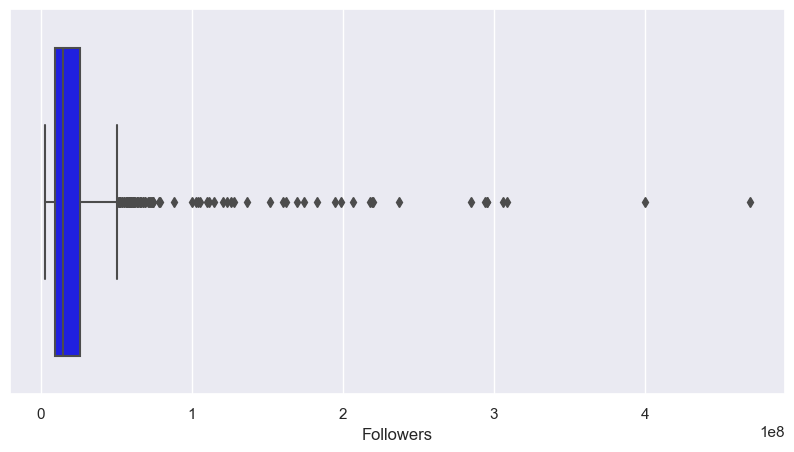

In [ ]:
plt.figure(figsize = (10, 5))
sns.set(style="darkgrid")

# Creando el grafico de cajas
sns.boxplot(data = influencer, x = "Followers", color= "blue");

In [ ]:
# calculamos los cuartiles

q3, q1 = np.percentile(influencer["Followers"], [75, 25])

print(f"El primer cuartil es {q1} y el tercer cuartil es {q3}")

El primer cuartil es 9000000.0 y el tercer cuartil es 25650000.0


In [ ]:
# rango intercuartilico

riq = q3 - q1
print("El rango intercuartílico es:", riq)

El rango intercuartílico es: 16650000.0


In [ ]:
# Coeficiente de variación

In [ ]:
influencer['Country'].unique()

array(['All'], dtype=object)

In [ ]:
paises_influencers = influencer[influencer["Regionname"] == 'Northern Victoria']
paises_influencers.head(2)